In [1]:
import os
import sys
import argparse
from os.path import dirname, realpath

sys.path.append("./src/")
sys.path.append(dirname(dirname(realpath(os.getcwd()))))
%run load_Results.py
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_regression
from sklearn.isotonic import IsotonicRegression
#!pip install ml_insights
import ml_insights as mli

y01, p01 = calibration_curve(M_test1['golds'], tp1, n_bins = 20)
y02, p02 = calibration_curve(M_test2['golds'], tp2 , n_bins = 20)
y03, p03 =calibration_curve(M_test3['golds'], tp3 , n_bins = 20)
y04, p04 = calibration_curve(M_test4['golds'], tp4 , n_bins = 20)


In [2]:
from betacal import BetaCalibration
from  scipy.stats import beta
from matplotlib.pyplot import figure 


In [3]:
neg_1 = mp1 [np.where(M1['golds']==0)]
neg_2 = mp2 [np.where(M2 ['golds']==0)]
neg_3 = mp3 [np.where(M3 ['golds']==0)]
neg_4 = mp4 [np.where(M4 ['golds']==0)]
pos_1 = mp1 [np.where(M1 ['golds']==1)]
pos_2 = mp2 [np.where(M2 ['golds']==1)]
pos_3 = mp3 [np.where(M3['golds']==1)]
pos_4 = mp4 [np.where(M4 ['golds']==1)]
### TRY BETA

In [12]:
pos = pos_1 
subneg=np.random.choice(neg_1, 40*sum(gold1))
p_test = tp1
y_test= M_test1['golds']
synth_size=5

In [279]:
def temp_scaling (logits, y, wts):
    def temperature_obj(t):
        temp_logits =   logits  *  t [0]   +t[1]
        probs =   expit(temp_logits)
        return log_loss(y, probs, sample_weight=wts)    
    res = minimize (temperature_obj,x0 = [.1,.1])
    return res.x

def temp_pred (alpha,  test_logit):    
    logi =  test_logit * alpha[0]   + alpha[1]
    proba =   expit ( logi   )  
    return proba

In [303]:
def temp_smote_plot(pos, subneg, p_test, y_test, 
               synth_size, wei):
        
    a, b, loc, scale = beta.fit(pos  , floc=0, fscale=1)
    synth_pos = np.random.beta(a,b,size = int( len(pos)*synth_size ))
    many_pos = np.concatenate((pos, synth_pos))
    probs = np.concatenate((subneg, many_pos))
    subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )
    weights =  np.ones(len(subgold))
    weights = np.where(subgold==1, wei ,1)

    #alpha =  temp_scaling ( (probs),subgold, weights )
    #temp_test = temp_pred(  alpha,    (p_test ))

    alpha =  temp_scaling (logit(probs),subgold, weights )
    temp_test = temp_pred(  alpha,   logit (p_test ))

    figure (figsize=(2.5,2.5))
    #normalized_temp_test = temp_test/ np.max(temp_test)
    mli.plot_reliability_diagram(y_test,  temp_test)
    return temp_test

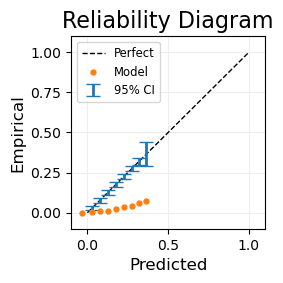

In [304]:
temp1 = temp_smote_plot(pos_1, subneg=np.random.choice(neg_1, 100*sum(gold1)),
           p_test = tp1, y_test= M_test1['golds'],   synth_size=25, wei=1)

array([0.11537627, 0.08988132, 0.1316001 , ..., 0.13233037, 0.11606045,
       0.15929607])

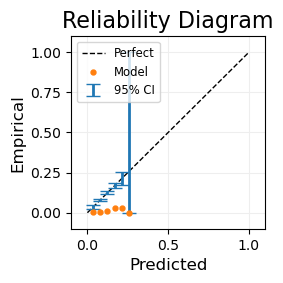

In [305]:
temp_smote_plot(pos_3, subneg=np.random.choice(neg_3, 60*sum(gold3)),
           p_test = tp3, y_test= M_test3['golds'],   synth_size=25, wei=.3)

array([0.01745217, 0.00874763, 0.03068933, ..., 0.01721303, 0.01801241,
       0.02310931])

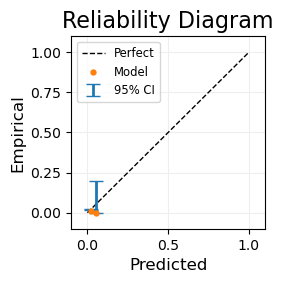

In [308]:
temp_smote_plot(pos_4, subneg=np.random.choice(neg_4, 50*sum(gold4)),
           p_test = tp4, y_test= M_test4['golds'],   synth_size=10, wei=.1)

In [294]:
def temp_smote(pos, subneg, p_test,
               synth_size):
        
    a, b, loc, scale = beta.fit(pos, floc=0, fscale=1)
    synth_pos = np.random.beta(a,b,size = int( len(pos)*synth_size ))
    many_pos = np.concatenate((pos, synth_pos))
    probs = np.concatenate((subneg, many_pos))
    subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )
    weights =  np.ones(len(subgold))

    alpha =  temp_scaling (logit(probs),subgold, weights )
    temp_test = temp_pred(  alpha,   logit(p_test ))
    return temp_test

In [70]:
I1 = []
for i in range(10):
    I1.append(iso_smote(pos_1, subneg=np.random.choice(neg_1, 20*sum(gold1)),
            p_test = tp1, y_test= M_test1['golds'],   synth_size=5))

<Figure size 250x250 with 0 Axes>

<Figure size 250x250 with 0 Axes>

<Figure size 250x250 with 0 Axes>

<Figure size 250x250 with 0 Axes>

<Figure size 250x250 with 0 Axes>

<Figure size 250x250 with 0 Axes>

<Figure size 250x250 with 0 Axes>

<Figure size 250x250 with 0 Axes>

<Figure size 250x250 with 0 Axes>

<Figure size 250x250 with 0 Axes>

In [59]:
?mli.plot_reliability_diagram

Signature:
mli.plot_reliability_diagram(
    y,
    x,
    bins=array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
    show_baseline=True,
    baseline_color='black',
    baseline_width=1,
    error_bars=True,
    error_bar_color='C0',
    error_bar_alpha=0.05,
    error_bar_width=2,
    ci_ref='axis',
    marker='.',
    marker_color='C1',
    marker_edge_color='C1',
    marker_size=50,
    scaling='none',
    scaling_eps=0.0001,
    scaling_base=10,
    cap_width=1,
    cap_size=5,
    show_histogram=False,
    bin_color='C0',
    bin_edge_color='black',
    ax1_x_title='Predicted',
    ax1_y_title='Empirical',
    ax2_x_title='Predicted Scores',
    ax2_y_title='Count',
    ax_title_weight='normal',
    ax_title_size=12,
    title_size=16,
    title_weight='normal',
    reliability_title='Reliability Diagram',
    histogram_title='Probability Distribution',
    layout_pad=3.0,
    legend_names

{'pred_probs': array([0.02397985, 0.0740195 , 0.12020952, 0.18937816, 0.2261806 ,
        0.27623993, 0.32082741, 0.38404764, 0.42474907, 0.47009018,
        0.52087601, 0.5679981 , 0.61695431, 0.66235043, 0.71439368,
        0.77580395, 0.84065934, 0.88096818, 0.95237891, 1.39614365]),
 'emp_probs': array([0.00405132, 0.00234742, 0.00728597, 0.01014493, 0.02021773,
        0.02258065, 0.0203666 , 0.03094778, 0.03055848, 0.03134479,
        0.03764954, 0.05524642, 0.09333333, 0.0472973 , 0.07462687,
        0.16      , 0.09090909, 0.05660377, 0.06666667, 0.0212766 ]),
 'bin_counts': array([1481.,  426., 1098.,  690.,  643.,  620.,  982.,  517., 1898.,
        1978., 2842., 2516.,   75.,  148.,   67.,   25.,   11.,   53.,
          15.,   47.])}

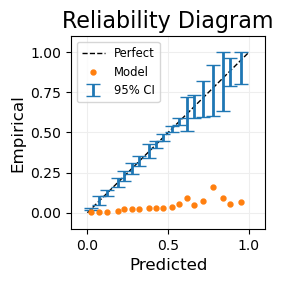

In [61]:
i1_sum = i1_1 + i1_2 + i1_3
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram( M_test1['golds'],  i1_sum  )


In [ ]:
def temp_scaling (logits, y, wts):
    def temperature_obj(t):
        temp_logits =   logits  /  t [0]  # +t[1]
        probs =  expit(temp_logits)
        return log_loss(y, probs, sample_weight=wts)    
    res = minimize (temperature_obj,x0 = [.1,.1])
    return res.x

def temp_pred (alpha,  test_logit):    
    logi =  test_logit / alpha[0]   #+ alpha[1]
    proba =  expit ( logi   )  
    return proba

In [ ]:
def temp_smote_plot(pos, subneg, p_test, y_test, 
               synth_size, wei):
        
    a, b, loc, scale = beta.fit(pos, floc=0, fscale=1)
    synth_pos = np.random.beta(a,b,size = int( len(pos)*synth_size ))
    many_pos = np.concatenate((pos, synth_pos))
    probs = np.concatenate((subneg, many_pos))
    subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )
    weights =  np.ones(len(subgold))
    weights = np.where(subgold==1, wei ,1)

    #alpha =  temp_scaling ( (probs),subgold, weights )
    #temp_test = temp_pred(  alpha,    (p_test ))

    alpha =  temp_scaling (logit(probs),subgold, weights )
    temp_test = temp_pred(  alpha,   logit(p_test ))

    figure (figsize=(2.5,2.5))
    mli.plot_reliability_diagram(y_test,  temp_test)
    return temp_test